<a href="https://colab.research.google.com/github/SmirnygaTotoshka/FBB_Courses/blob/main/S04_SVM_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt

## C = inf

In [ ]:
iris = datasets.load_iris() # датасет с данными об ирисах, собранный Фишером, содержит три вида ирисов
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) 
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Обучим классификатор с бесконечным штрафом за неправильную классификацию 

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf) 
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# handson-ml course 
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

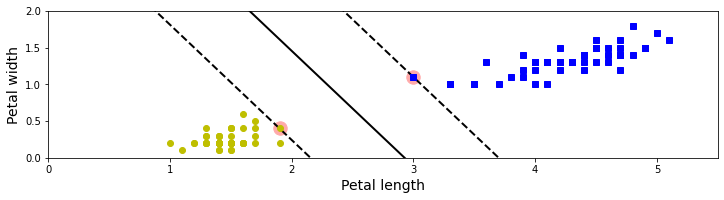

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Подпишите на графике опорные вектора. Что они собой представляют?

Добавим один выброс

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf) 
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf.fit(X_out, y_out)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

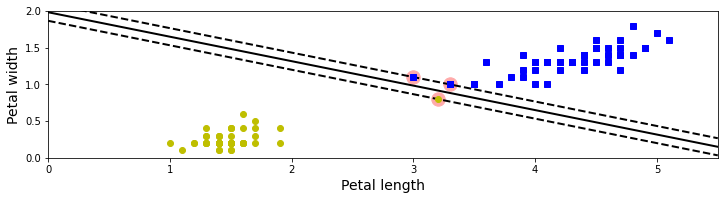

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Объясните, почему полученное решение плохое. 

Теперь добавим другой выброс

In [ ]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])



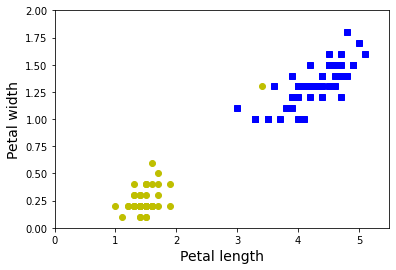

In [ ]:
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Объясните, почему ниже расположенная строчка кода приводит к зависанию

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf) 
svm_clf.fit(X_out, y_out)

## Чувствительность к масштабу признаков

(-2.0, 2.0, -2.0, 2.0)

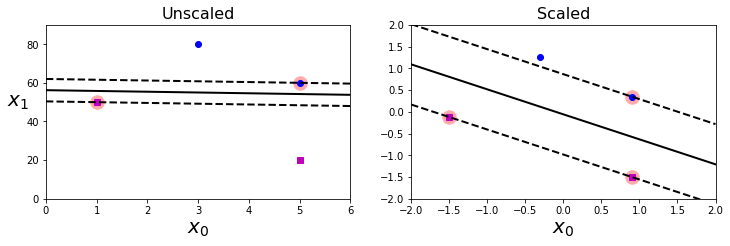

In [ ]:
# handson-ml course 

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

Чувствителен ли SVM к масштабу признаков? 

Какой еще алгоритм из разобранных ранее крайне чувствителен к масштабу признаков?

## Разные значения C

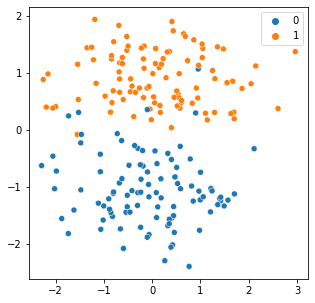

In [ ]:
X, Y = datasets.make_classification(n_features=2, 
                                       n_redundant=0,
                                       n_informative=1,
                                       random_state=202, 
                                       n_clusters_per_class=1,
                                       flip_y=0, 
                                       n_samples=200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 1], y=X[:, 0], hue=Y)
plt.show()

Продемонстрируйте (при помощи графиков и используя датасет, сгенерированный в предыдущей ячейке), как меняется граница решений для kernel="linear" в зависимости от значения C

Как связан bias-variance trade-off с значением параметра C

## Разные ядра

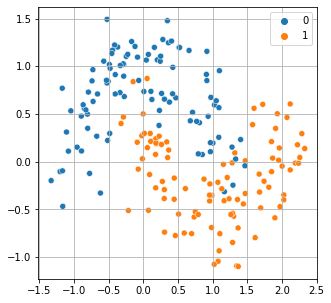

In [ ]:
X, Y = datasets.make_moons(n_samples=200, 
                           noise=0.25,
                           random_state=200)
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
plt.grid(True, which='both')
plt.show()

In [ ]:
# handson-ml course 

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 500)
    x1s = np.linspace(axes[2], axes[3], 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

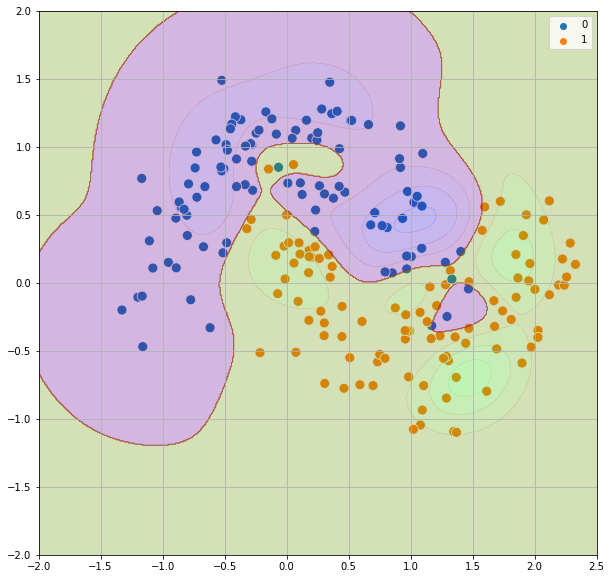

In [ ]:
svm = SVC(kernel="rbf", gamma=5, C=1000)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

Постройте decision border для kernel="poly" для значений degree 3, 5, 10 и 20. C поставьте равным 10 

Используя построенные графики скажите, какая степень полинома дает лучшее решение?  

Как думаете, будет ли зависеть потребление памяти моделью от степени полинома?

Проверьте свои догадки при помощи функции memit jupyter-notebook https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

In [ ]:
pip install memory_profiler

In [ ]:
%load_ext memory_profiler

Постройте decision border для kernel="rbf" для значений gamma=0.1, 3 и 0.5 и C =0.001, 1000.

#### Дополнительно 

На рисунке, который вы получите для gamma=5, C=1000, есть области, в которых нет никаких точек. 

Эти области "явно" расположены ближе к синим точкам, чем к желтым. 

Однако, по какой-то причине, модель в этих областях принимает решение не в пользу синих точек. 

Почитайте подробнее про то, как устроено ядро rbf и попытайтесь объяснить наблюдаемый феномен

# Предсказание растворимости веществ

Загрузим недавно опубликованный датасет [AqSolDB](https://www.nature.com/articles/s41597-019-0151-1), объединяющий информацию о растворимости химических веществ из разных источников. 



In [ ]:
!wget  https://kodomo.fbb.msu.ru/FBB/year_20/ml/curated-solubility-dataset.csv

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("curated-solubility-dataset.csv")

In [ ]:
data.head()

В качестве Y используйте колонку **Solubility**

В качестве X - все колонки после Solubility

Разбейте ваши данные на обучение и тест в отношении 8:2

Попробуйте на данной задаче и на основе только посчитанных авторами признаков (начинаются с MolWt), предсказать растворимость веществ при помощи:

1. Линейной регрессии

2. KNN-регрессии

3. SVM (понадобится SVR из пакета)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

Так как у второго и третьего алгоритма есть гиперпараметры, то сначала на трейне используйте GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# пример из мануала для SVC- адаптируйте к вашей задаче
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

Для SVR используйте те же параметры, что указаны в ячейке. 
Для KNN - число соседей

Выберите лучший на кросс-валидации алгоритм

Проверьте финальную модель на тесте

Какие проблемы вы видите в случайном разбиении, примененом нами

# Классификация мутаций при помощи deltaSVM 

Качать файлы из сети в коллабе можно при помощи команды **wget**

`!wget`

Скачайте файл [aldobecr11_seqs.tsv](https://kodomo.fbb.msu.ru/FBB/year_21/aldobecr11_seqs.csv) с прошлого семинера, в который добавили последовательности длины 21 нуклеотид, окружающие замену

In [ ]:
!wget https://kodomo.fbb.msu.ru/FBB/year_21/aldobecr11_seqs.csv

Загрузите веса deltaSVM для клеточной линии [HepG2](https://kodomo.fbb.msu.ru/FBB/year_21/hepg2.out) 

In [ ]:
?data.to_csv

Далее идет код для работы с весами deltaSVM

In [ ]:
from dataclasses import dataclass, field
from typing import Dict, Tuple, Union, Optional, Generator
from pathlib import Path

def reverse_complement(seq: str, alphabet: Optional[Dict[str, str]] = None) -> str:
    if alphabet is None:
        alphabet = {"A": "T", "C": "G", "G": "C", "T": "A"}
    rev_compl = []
    for s in reversed(seq):
        rev_compl.append(alphabet[s])
    return "".join(rev_compl)

def kmer_split(seq: str, k: int) -> Generator[str, None, None]:
    if k <= 0:
        raise Exception(f"k must be positive: {k}")
    if len(seq) < k:
        raise Exception(
            f"Length of sequence must be equal or greater than k, {k} vs {len(seq)}"
        )

    for i in range(0, len(seq) - k + 1, 1):
        yield seq[i : i + k]

@dataclass
class SVMDelta:
    scores: Dict[str, float] = field(repr=False)
    k: int
    distinct_reversed: bool = False

    def __post_init__(self) -> None:
        self._check_scores()

    def _check_scores(self) -> None:
        kmers_cnt = 4 ** self.k
        if kmers_cnt != len(self.scores):
            raise GkmSvmException(
                "Scores doesn't include information about all kmers."
                f"Entries: {len(self.scores)}. Required: {kmers_cnt}"
            )

    @staticmethod
    def _check_seq(seq: str) -> None:
        for s in seq:
            if s not in ("A", "T", "G", "C"):
                raise GkmSvmException(f"Sequence must contain only A, T, G and C: {s}")

    def decision_function(self, seq: str) -> float:
        self._check_seq(seq)
        score = 0.0

        for kmer in kmer_split(seq, self.k):
            score += self.scores[kmer]
        return score

    def _trunc_seq(self, seq: str, pos: int) -> Tuple[str, int]:
        ss = max(0, pos - self.k + 1)
        se = min(len(seq), pos + self.k)
        return seq[ss:se], pos - ss

    @staticmethod
    def _get_alt_seq(seq: str, pos: int, alt: str) -> str:
        return seq[:pos] + alt + seq[pos + 1 :]

    def score_snv(self, seq: str, pos: int, alt: str) -> float:
        seq, pos = self._trunc_seq(seq, pos)
        ref_seq = seq
        alt_seq = self._get_alt_seq(seq, pos, alt)
        ref_score = self.decision_function(ref_seq)
        alt_score = self.decision_function(alt_seq)
        return alt_score - ref_score

    @staticmethod
    def _check_save_path(path: Path, exists_ok: bool = True) -> None:
        if path.exists():
            if not exists_ok:
                raise GkmSvmException(f"Provided path exists: {path}")
            if not path.is_file():
                raise GkmSvmException(f"Provided path is not a file: {path}")

    def save(self, path: Union[Path, str], exist_ok: bool = True) -> None:
        path = Path(path)
        self._check_save_path(path, exist_ok)
        with open(path, "w") as out:
            for kmer, score in self.scores.items():
                print(f"{kmer}\t{score}", file=out)

    @staticmethod
    def _check_load_path(path: Path) -> None:
        if not path.exists():
            raise GkmSvmException(f"Provided path doesn't exist: {path}")
        if not path.is_file():
            raise GkmSvmException(f"Provided path is not a file: {path}")

    @classmethod
    def load(cls, path: Union[Path, str], distinct_reversed: bool = False):
        path = Path(path)
        cls._check_load_path(path)
        dt: Dict[str, float] = {}
        with open(path, "r") as k_scores:
            seq, _ = k_scores.readline().split()
            k = len(seq)
            k_scores.seek(0)

            for ind, line in enumerate(k_scores):
                seq, score_s = line.split()
                score = float(score_s)
                if len(seq) != k:
                    raise GkmSvmException(
                        f"Provided file contains kmers of different size: line {ind}. "
                        f"Expected {k}, got {len(seq)}"
                    )
                dt[seq] = score
                if not distinct_reversed:
                    r_seq = reverse_complement(seq)
                    dt[r_seq] = score
        return cls(dt, k, distinct_reversed=distinct_reversed)

Пример запуска - оценим вклад замены в середине последовательности 

In [ ]:
model = SVMDelta.load("hepg2.out")

Для каждой строки таблицы посчитайте вклад замены, оценный при помощи deltaSVM.


Оцените корреляцию Value и полученного скора

In [ ]:
from scipy.stats import pearsonr, spearmanr

Постройте график зависимости deltaSVM скора от колонки Value в файле aldobecr11.tsv

## "Парадокс"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

Создадим таблицу 200 на 10000 со "здоровыми" и "больными" пациентами и данными об "экспрессии" их генов. 


In [ ]:
gene_count = 10000
genes = [f"Gene{ind}" for ind in range(gene_count)]
healthy = pd.DataFrame(np.random.normal(size=(100, gene_count), 
                                        loc=0, 
                                        scale=1), 
                       columns=genes)
healthy['State'] = "H"
diseased = pd.DataFrame(np.random.normal(size=(100, gene_count), 
                                         loc=0, 
                                         scale=1),
                        columns=genes)
diseased['State'] = "D"
patients = pd.concat([healthy, diseased], axis=0)

In [ ]:
patients

In [ ]:
X = patients.drop("State", axis=1)
Y = patients['State']

In [ ]:
top_k = 10

diffs = X[Y == "H"].mean(axis=0) - X[Y == 'D'].mean(axis=0)
top = np.abs(diffs).sort_values(ascending=False)[0:top_k]
genes = top.index

In [ ]:
X_selected = X[genes]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y == "D", test_size=0.3)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


In [ ]:
y_train_pred = model.predict_proba(X_train)[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

In [ ]:
y_test_pred = model.predict_proba(X_test)[:, 1]
train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("Test quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Очевидно, что мы не могли выучить никаких разумных признаков. Однако, мы их все же выучили... Объясните полученный парадокс

Тем не менее, может мы просто что-то делаем не так. Попробуем встроенные в sklearn методы для выбора признаков

In [ ]:
from sklearn.feature_selection import (SelectKBest, SelectFdr, SelectFwe,
                                       SelectPercentile, f_classif)

In [ ]:
X_selected = SelectKBest(f_classif, k=10).fit_transform(X, Y)

Повторите все на отобранных стандартным методом sklearn признаках. Результат объясните

Что делает метод выделения признаков SelectFdr? Что такое FDR? Опишите ниже

Примените метод SelectFdr. Результат объясните

Почему вообще возникла проблема в начале? Объясните

Как бы эту проблему можно было бы избежать?